### 1.Data collection

In [ ]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2.Understanding Dataset


In [ ]:
print(df.info())
# x=df['total_bill']
# y=df['tip']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


3.Stats Summary

In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


4.Relationship check


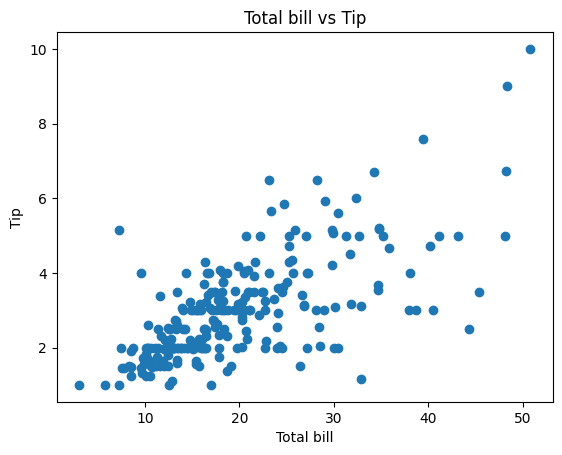

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df['total_bill'],y=df['tip'])
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Total bill vs Tip")
plt.show()


Observations:
1.As the bill increases the tip increases
2.Relationship:Straight line (we can use SLR)

5.Feature & Target Extraction
 

In [5]:
x=df[['total_bill']]  #I/P must be in 2D matrix
print(x)
y=df['tip']

     total_bill
0         16.99
1         10.34
2         21.01
3         23.68
4         24.59
..          ...
239       29.03
240       27.18
241       22.67
242       17.82
243       18.78

[244 rows x 1 columns]


6.Train-Test Split (The model must perform well on unseen data)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # 80% training 20% training

7.Feature Standardization
why?
1.Compare the Co-efficients fairly
2.Avoid the dominance of large values
3.prepeare for Ridge/Lasso regression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train) # (lists values of different features as feat1 feat2)fit calculates the mean and S.D of features
x_test_scaled=sc.transform(x_test) # scales all the values(Standardizes) having mean=0,S.D=1

#    1.Fit only on training data
#   2.Prevents the data leakage

8.Train Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Coefficient ",model.coef_[0]) #slope the change in y for unit change in x
print("Intercept ",model.intercept_)

Coefficient  0.9357171400271826
Intercept  3.0877948717948724


In [27]:
y_pred=model.predict(x_test_scaled)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test,y_pred)
print("r2 score: ",r2)
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error: ",mse)

r2 score:  0.5449381659234664
mean_squared_error:  0.5688142529229538


10.Visualize the best fit line

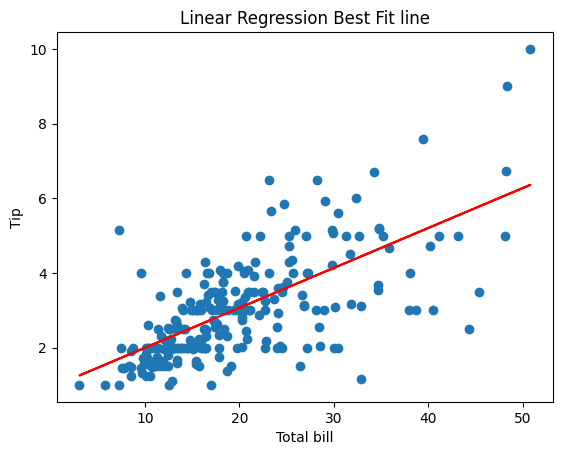

In [35]:
plt.scatter(x,y)
plt.plot(x,model.predict(sc.transform(x)),color="red")
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Linear Regression Best Fit line")
plt.show()

11.Input Output RealTime

In [40]:
bill_amt=float(input("Enter bill amount"))
bill_scaled=sc.transform([[bill_amt]])
predicted_tip=model.predict(bill_scaled)
print(f"predicted tip {round(predicted_tip[0],2)}")

predicted tip 54.41


C:\Users\728sa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
